# BBM469 : Data Intensive Applications Lab. Assignment 2

#### Pre-Note
###### Graphs and Tables will be updated on new run.

### PROBLEM DEFINITION :
In this assignment, we were asked to understand the classification and clustering algorithms using python libraries and perform a basic experiment with appropriate datasets. We have also dealt with data manipulation and data normalization.

In [23]:
# Installing necessary modules from the text file
!pip install -r requirements.txt

ERROR: Could not find a version that satisfies the requirement pandas~=1.3.4 (from versions: 0.1, 0.2, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.5.0, 0.6.0, 0.6.1, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.13.0, 0.13.1, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.15.2, 0.16.0, 0.16.1, 0.16.2, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.19.2, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.21.0, 0.21.1, 0.22.0, 0.23.0, 0.23.1, 0.23.2, 0.23.3, 0.23.4, 0.24.0, 0.24.1, 0.24.2, 0.25.0, 0.25.1, 0.25.2, 0.25.3, 1.0.0, 1.0.1, 1.0.2, 1.0.3, 1.0.4, 1.0.5, 1.1.0, 1.1.1, 1.1.2, 1.1.3, 1.1.4, 1.1.5)
ERROR: No matching distribution found for pandas~=1.3.4


### Packages and First Look to the Dataset

In [24]:
# Importing packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

##### Util functions

In [25]:
def display_confusion_matrix(confusion_matrix, message):
    # Heatmap display for confusion matrix
    labels = ["TN", "FP", "FN", "TP"]
    length = len(max(labels)) + 12
    labels = np.asarray(labels).reshape(2, 2)

    annots = [f"{str(label)}({str(value)})" for array in np.dstack((labels, confusion_matrix)) for (label, value) in
              array]
    annots = np.asarray(annots).reshape(2, 2).astype(str)
    plt.figure(figsize=(12, 8))
    plt.title("Confusion Matrix of {0}".format(message))
    sns.heatmap(confusion_matrix, annot=annots, fmt=f".{length}")
    plt.show()

In [26]:
# Dimension-Reduction algorithm t-SNE for visualizing clusters

from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

def dimension_reduction_visualize(x, y, x_normalized, y_normalized, isClustered):
    reduced_X_tSNE = TSNE(n_components=2, random_state=0).fit_transform(x.values)
    reduced_X_tSNE_normalized = TSNE(n_components=2, random_state=0).fit_transform(x_normalized.values)

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    f.suptitle("Clusters")

    #t-SNE scatter plot
    ax1.scatter(reduced_X_tSNE[:, 0], reduced_X_tSNE[:, 1], c=(y == 0), cmap="coolwarm", label="Non Diabetes",
                linewidths=3)
    ax1.scatter(reduced_X_tSNE[:, 0], reduced_X_tSNE[:, 1], c=(y == 1), cmap="coolwarm", label="Diabetes",
                linewidths=3)
    if isClustered:
        ax1.set_title("Original k-means clustered dataset (COD)", fontsize=14)
    else:
        ax1.set_title("Original dataset (OD)", fontsize=14)

    ax1.grid(False)

    ax2.scatter(reduced_X_tSNE_normalized[:, 0], reduced_X_tSNE_normalized[:, 1], c=(y_normalized == 0),
                cmap="coolwarm",
                label="Non Diabetes",
                linewidths=3)
    ax2.scatter(reduced_X_tSNE_normalized[:, 0], reduced_X_tSNE_normalized[:, 1], c=(y_normalized == 1),
                cmap="coolwarm",
                label="Diabetes",
                linewidths=3)

    if isClustered:
        ax2.set_title("Normalized k-means clustered dataset (CND)", fontsize=14)
    else:
        ax2.set_title("Normalized dataset (ND)", fontsize=14)

    ax2.grid(False)

    blue_legend = mpatches.Patch(color="#0A0AFF", label="Non Diabetes")
    red_legend = mpatches.Patch(color="#AF0000", label="Diabetes")
    ax1.legend(handles=[blue_legend, red_legend])
    ax2.legend(handles=[blue_legend, red_legend])

In [27]:
# Reading dataset with special seperator
df = pd.read_csv("diabetes_data.csv", sep=";")

In [28]:
# Statistical info about df
df.describe()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,58,Female,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1
1,47,Male,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,36,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,62,Male,1,1,0,1,1,0,1,0,1,0,1,1,0,0,1
4,54,Male,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0


In [29]:
# We must encode the 'gender' feature in later steps since it is not a numeric feature.
df.info()

,age,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
# Percentage of the classes
print("Non diabetes samples make up", round(df["class"].value_counts()[0] / len(df) * 100, 2), "% of the dataset.")
print("Diabetes samples make up", round(df["class"].value_counts()[1] / len(df) * 100, 2), "% of the dataset.")
# Plotting results
sns.countplot(x="class", data=df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

Non diabetes samples make up 38.46 % of the dataset.
Diabetes samples make up 61.54 % of the dataset.


<AxesSubplot:xlabel='class', ylabel='count'>

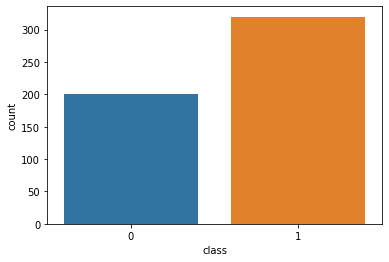

In [31]:
### Data Preprocessing

#### CREATING OD (original dataset)

# Encoding 'gender' feature with LabelEncoder
enc = LabelEncoder()
df["gender"] = enc.fit_transform(df["gender"].astype(str))

df.head()

In [32]:
# Correlation map for the features
df_sns = df.drop(labels="class", axis=1, inplace=False)
corr = df_sns.corr()
sns.heatmap(corr)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,58,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1
1,47,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,62,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0,1
4,54,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0


<AxesSubplot:>

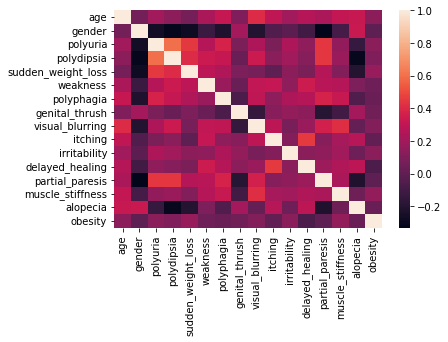

In [33]:
#### CREATING ND (normalized dataset)

# Creating the normalized dataset with MinMaxScaler algorithm
scaler = MinMaxScaler()
normalized_df = df.copy()
normalized_df["age"] = scaler.fit_transform(normalized_df["age"].values.reshape(-1, 1))

normalized_df.head()

In [34]:
normalized_non_diabetes = normalized_df[normalized_df["class"] == 0]
normalized_diabetes = normalized_df[normalized_df["class"] == 1]

# Shape of our normalized dataframe elements.
data = {"class": ["Non-Diabetes", "Diabetes"], "Shape": [normalized_non_diabetes.shape, normalized_diabetes.shape]}
info_df = pd.DataFrame(data)
info_df

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,0.567568,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1
1,0.418919,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0.270270,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.621622,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0,1
4,0.513514,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0


In [35]:
#### CREATING COD (clustered original dataset)

,class,Shape
0,Non-Diabetes,"(200, 17)"
1,Diabetes,"(320, 17)"


# Clustering part
from sklearn.cluster import KMeans

clustered_df = df.copy()
X_clustered = clustered_df.drop("class", axis=1)
y_clustered = clustered_df["class"]

# Clustering with KMeans algorithm according to desired cluster number
clustered_df["predicted_class"] = KMeans(n_clusters=clustered_df["class"].nunique(dropna=True), random_state=0).fit_predict(
    X_clustered)
clustered_df.head()

In [36]:
#### CREATING CND (clustered and normalized dataset)


,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,predicted_class
0,58,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0
1,47,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,36,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,62,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0,1,0
4,54,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0


clustered_normalized_df = normalized_df.copy()
X_clustered_normalized = clustered_normalized_df.drop("class", axis=1)
y_clustered_normalized = clustered_normalized_df["class"]

clustered_normalized_df["predicted_class"] = KMeans(n_clusters=clustered_normalized_df["class"].nunique(dropna=True),
                                          random_state=0).fit_predict(X_clustered_normalized)
clustered_normalized_df.head()

In [37]:
# Following schemes are meaningless since we have no non-binary values.
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes[0, 0].scatter(df.iloc[:, 0], df.iloc[:, 3])
axes[0, 0].set_title("Original data")
axes[0, 1].scatter(normalized_df.iloc[:, 0], normalized_df.iloc[:, 3])
axes[0, 1].set_title("Normalized data")
axes[1, 0].scatter(clustered_df.iloc[:, 0], clustered_df.iloc[:, 3])
axes[1, 0].set_title("Clustered data")
axes[1, 1].scatter(clustered_normalized_df.iloc[:, 0], clustered_normalized_df.iloc[:, 3])
axes[1, 1].set_title("Clustered normalized data")
plt.show()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,predicted_class
0,0.567568,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0
1,0.418919,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,0.270270,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.621622,1,1,1,0,1,1,0,1,0,1,0,1,1,0,0,1,0
4,0.513514,1,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1


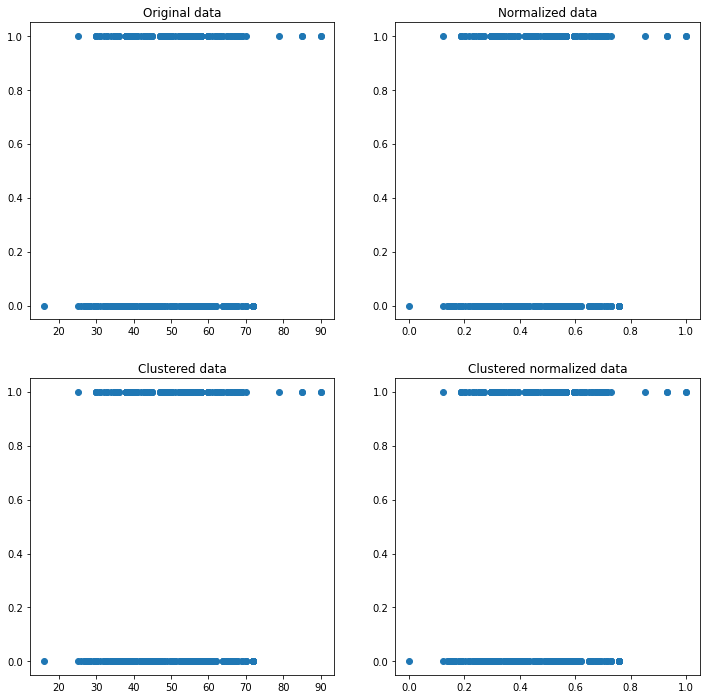

In [38]:
##### Dimension Reduction

# Dimension-Reduction algorithm t-SNE for visualizing clusters
x_od = df.drop("class", axis=1)
y_od = df["class"]
x_nd = normalized_df.drop("class", axis=1)
y_nd = normalized_df["class"]

x_cod = clustered_df.drop("class", axis=1)
y_cod = clustered_df["class"]
x_cnd = clustered_normalized_df.drop("class", axis=1)
y_cnd = clustered_normalized_df["class"]
dimension_reduction_visualize(x_od, y_od, x_nd, y_nd, False)
dimension_reduction_visualize(x_cod, y_cod, x_cnd, y_cnd, True)


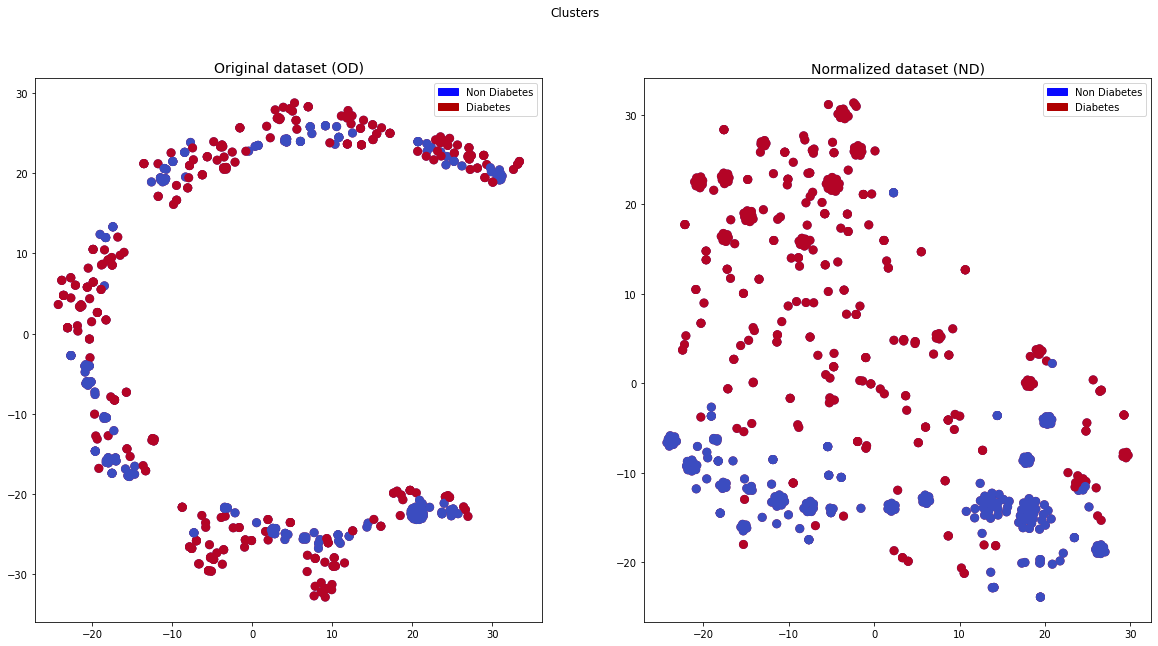

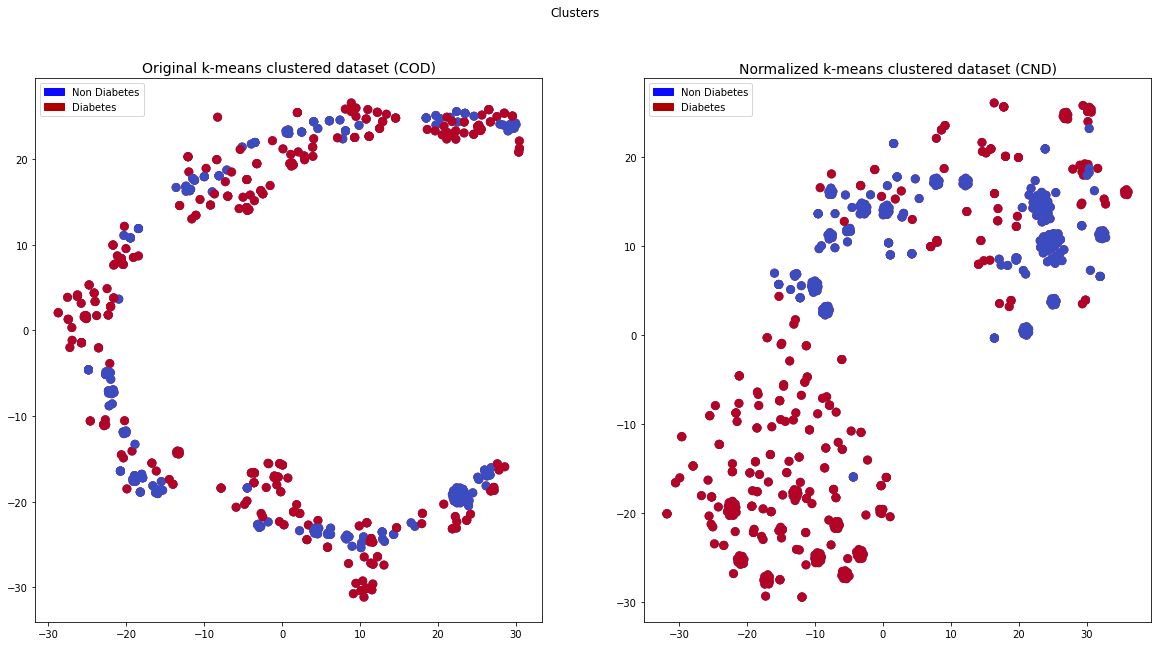

In [39]:
# Data Partitioning-Splitting
from sklearn.model_selection import train_test_split

# OD
x_train_df, x_test_df, Y_train_df, Y_test_df = train_test_split(df.loc[:, df.columns != 'class'], df.loc[:, ['class']],
                                                                test_size=0.2, random_state=1)
# COD
x_train_clustered_df, x_test_clustered_df, Y_train_clustered_df, Y_test_clustered_df = train_test_split(
    clustered_df.loc[:, clustered_df.columns != 'class'], clustered_df.loc[:, ['class']], test_size=0.2, random_state=1)

# ND
x_train_normalized_df, x_test_normalized_df, Y_train_normalized_df, Y_test_normalized_df = train_test_split(
    normalized_df.loc[:, normalized_df.columns != 'class'], normalized_df.loc[:, ['class']], test_size=0.2,
    random_state=1)

# CND
x_train_clustered_normalized_df, x_test_clustered_normalized_df, Y_train_clustered_normalized_df, Y_test_clustered_normalized_df = train_test_split(
    clustered_normalized_df.loc[:, clustered_normalized_df.columns != 'class'],
    clustered_normalized_df.loc[:, ['class']], test_size=0.2, random_state=1)

In [40]:
#### Model Training-Optimizing and Evaluation


import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbour algorithm for classifying task
knn = KNeighborsClassifier()
normalized_knn = KNeighborsClassifier()
clustered_knn = KNeighborsClassifier()
clustered_normalized_knn = KNeighborsClassifier()

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
# Using GridSearchCV algorithm for optimizing our classifier objects
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Defining parameter range
k_range = list(range(3, 31, 2))
param_grid = dict(n_neighbors=k_range)

def optimized_prediction(knn, x_train, y_train, x_test, y_test, isNormalized, isClustered, message):

    grid_list = []
    score_list = []

    for i in range(2, 11):
        kf = KFold(n_splits=i)
        grid_search = GridSearchCV(knn, param_grid, cv=kf, scoring='accuracy', return_train_score=True, verbose=1)
        grid_search.fit(x_train, np.array(y_train).ravel())
        grid_list.append(grid_search)
        score_list.append(grid_search.best_score_)

    print("Best k value for CV : {0} - Score : {1}".format(score_list.index(max(score_list))+2, max(score_list)))
    print(score_list)
    grid_search = grid_list.pop(score_list.index(max(score_list)))

    print("Best k value for KNN: " + str(grid_search.best_params_))

    plt.plot(list(range(2,11)), score_list)
    plt.title("K-Fold Scores")
    plt.xlabel("k value")
    plt.ylabel("Score")

    accuracy = grid_search.best_score_ * 100
    if isNormalized:
        if isClustered:
            print("Accuracy for our clustered normalized training dataset with tuning is : {:.2f}%".format(accuracy))
        else:
            print("Accuracy for our normalized training dataset with tuning is : {:.2f}%".format(accuracy))
    else:
        if isClustered:
            print("Accuracy for our clustered original training dataset with tuning is : {:.2f}%".format(accuracy))
        else:
            print("Accuracy for our original training dataset with tuning is : {:.2f}%".format(accuracy))

    knn = grid_search.best_estimator_

    knn.fit(x_train, np.array(y_train).ravel())

    y_test_hat = knn.predict(x_test)

    test_accuracy = accuracy_score(y_test, y_test_hat) * 100

    if isNormalized:
        if isClustered:
            print(
                "Accuracy for our clustered normalized testing dataset with tuning is : {:.2f}%".format(test_accuracy))
        else:
            print("Accuracy for our normalized testing dataset with tuning is : {:.2f}%".format(test_accuracy))
    else:
        if isClustered:
            print("Accuracy for our clustered original testing dataset with tuning is : {:.2f}%".format(test_accuracy))
        else:
            print("Accuracy for our original testing dataset with tuning is : {:.2f}%".format(test_accuracy))
    print("Precision score: {:.2f}%".format(precision_score(y_test, y_test_hat)))
    print("Recall score: {:.2f}%".format(recall_score(y_test, y_test_hat)))
    display_confusion_matrix(confusion_matrix(y_test, y_test_hat), message=message)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
# Using GridSearchCV algorithm for optimizing our classifier objects
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Defining parameter range
k_range = list(range(3, 31, 2))
param_grid = dict(n_neighbors=k_range)

def optimized_prediction(knn, x_train, y_train, x_test, y_test, isNormalized, isClustered, message):

    grid_list = []
    score_list = []

    for i in range(2, 11):
        kf = KFold(n_splits=i)
        grid_search = GridSearchCV(knn, param_grid, cv=kf, scoring='accuracy', return_train_score=True, verbose=1)
        grid_search.fit(x_train, np.array(y_train).ravel())
        grid_list.append(grid_search)
        score_list.append(grid_search.score(x_train, y_train))

    print("Best k value for CV : {0} - Score : {1}".format(score_list.index(max(score_list))+2, max(score_list)))
    print(score_list)
    grid_search = grid_list.pop(score_list.index(max(score_list)))

    print("Best k value for KNN: " + str(grid_search.best_params_))

    plt.plot(list(range(2,11)), score_list)
    plt.title("K-Fold Scores")
    plt.xlabel("k value")
    plt.ylabel("Score")

    accuracy = grid_search.best_score_ * 100
    if isNormalized:
        if isClustered:
            print("Accuracy for our clustered normalized training dataset with tuning is : {:.2f}%".format(accuracy))
        else:
            print("Accuracy for our normalized training dataset with tuning is : {:.2f}%".format(accuracy))
    else:
        if isClustered:
            print("Accuracy for our clustered original training dataset with tuning is : {:.2f}%".format(accuracy))
        else:
            print("Accuracy for our original training dataset with tuning is : {:.2f}%".format(accuracy))

    knn = grid_search.best_estimator_

    knn.fit(x_train, np.array(y_train).ravel())

    y_test_hat = knn.predict(x_test)

    test_accuracy = accuracy_score(y_test, y_test_hat) * 100

    if isNormalized:
        if isClustered:
            print(
                "Accuracy for our clustered normalized testing dataset with tuning is : {:.2f}%".format(test_accuracy))
        else:
            print("Accuracy for our normalized testing dataset with tuning is : {:.2f}%".format(test_accuracy))
    else:
        if isClustered:
            print("Accuracy for our clustered original testing dataset with tuning is : {:.2f}%".format(test_accuracy))
        else:
            print("Accuracy for our original testing dataset with tuning is : {:.2f}%".format(test_accuracy))
    print("Precision score: {:.2f}%".format(precision_score(y_test, y_test_hat)))
    print("Recall score: {:.2f}%".format(recall_score(y_test, y_test_hat)))
    display_confusion_matrix(confusion_matrix(y_test, y_test_hat), message=message)

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 6 folds for each of 14 candidates, totalling 84 fits
Fitting 7 folds for each of 14 candidates, totalling 98 fits
Fitting 8 folds for each of 14 candidates, totalling 112 fits
Fitting 9 folds for each of 14 candidates, totalling 126 fits
Fitting 10 folds for each of 14 candidates, totalling 140 fits
Best k value for CV : 6 - Score : 0.8966528640441683
[0.8197115384615385, 0.8581830188023494, 0.8701923076923077, 0.8774813539873781, 0.8966528640441683, 0.8847054075867636, 0.8918269230769231, 0.8895569945523693, 0.8918699186991871]
Best k value for KNN: {'n_neighbors': 3}
Accuracy for our original training dataset with tuning is : 89.67%
Accuracy for our original testing dataset with tuning is : 91.35%
Precision score: 0.98%
Recall score: 0.

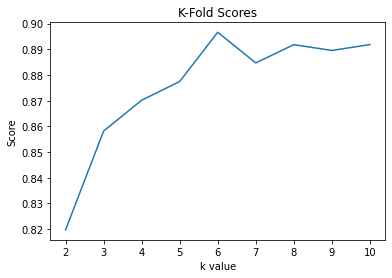

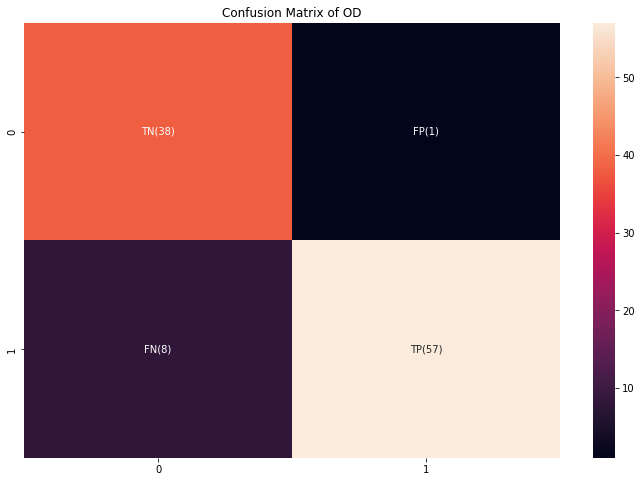

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 6 folds for each of 14 candidates, totalling 84 fits
Fitting 7 folds for each of 14 candidates, totalling 98 fits
Fitting 8 folds for each of 14 candidates, totalling 112 fits
Fitting 9 folds for each of 14 candidates, totalling 126 fits
Fitting 10 folds for each of 14 candidates, totalling 140 fits
Best k value for CV : 8 - Score : 0.9519230769230769
[0.9038461538461539, 0.9374934834740903, 0.9447115384615383, 0.9471600688468158, 0.9447550034506556, 0.9447941888619855, 0.9519230769230769, 0.9495837187789085, 0.9519163763066201]
Best k value for KNN: {'n_neighbors': 3}
Accuracy for our normalized training dataset with tuning is : 95.19%
Accuracy for our normalized testing dataset with tuning is : 95.19%
Precision score: 0.97%
Recall score

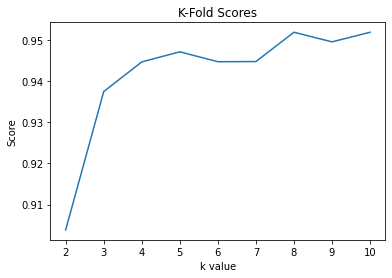

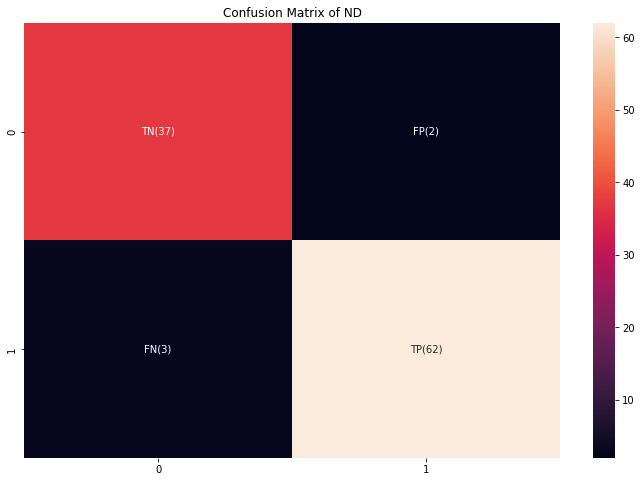

In [43]:
# PREDICTION WITH ORIGINAL DATASET STEP

# Prediction for OD
optimized_prediction(knn, x_train_df, Y_train_df, x_test_df, Y_test_df, isNormalized=False, isClustered=False,
                     message="OD")
# Prediction for ND
optimized_prediction(normalized_knn, x_train_normalized_df, Y_train_normalized_df, x_test_normalized_df,
                     Y_test_normalized_df, isNormalized=True, isClustered=False, message="ND")

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 6 folds for each of 14 candidates, totalling 84 fits
Fitting 7 folds for each of 14 candidates, totalling 98 fits
Fitting 8 folds for each of 14 candidates, totalling 112 fits
Fitting 9 folds for each of 14 candidates, totalling 126 fits
Fitting 10 folds for each of 14 candidates, totalling 140 fits
Best k value for CV : 6 - Score : 0.8966528640441683
[0.8197115384615385, 0.8581830188023494, 0.8701923076923077, 0.8774813539873781, 0.8966528640441683, 0.8847054075867636, 0.8918269230769231, 0.8895569945523693, 0.8918699186991871]
Best k value for KNN: {'n_neighbors': 3}
Accuracy for our clustered original training dataset with tuning is : 89.67%
Accuracy for our clustered original testing dataset with tuning is : 89.42%
Precision score: 0.

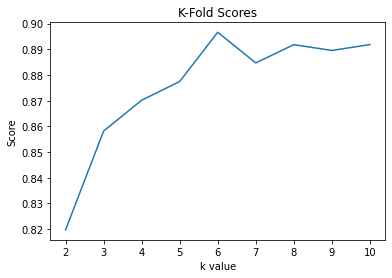

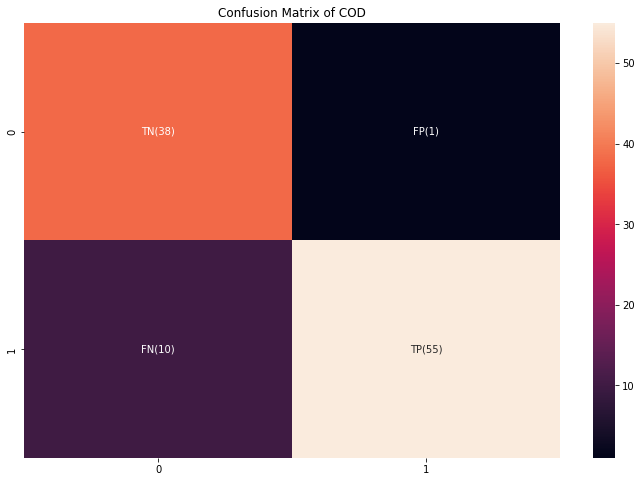

Fitting 2 folds for each of 14 candidates, totalling 28 fits
Fitting 3 folds for each of 14 candidates, totalling 42 fits
Fitting 4 folds for each of 14 candidates, totalling 56 fits
Fitting 5 folds for each of 14 candidates, totalling 70 fits
Fitting 6 folds for each of 14 candidates, totalling 84 fits
Fitting 7 folds for each of 14 candidates, totalling 98 fits
Fitting 8 folds for each of 14 candidates, totalling 112 fits
Fitting 9 folds for each of 14 candidates, totalling 126 fits
Fitting 10 folds for each of 14 candidates, totalling 140 fits
Best k value for CV : 8 - Score : 0.9471153846153846
[0.8966346153846154, 0.9302992388697738, 0.935096153846154, 0.9423407917383819, 0.9399240855762594, 0.939951573849879, 0.9471153846153846, 0.9447528009045123, 0.9470963995354239]
Best k value for KNN: {'n_neighbors': 3}
Accuracy for our clustered normalized training dataset with tuning is : 94.71%
Accuracy for our clustered normalized testing dataset with tuning is : 95.19%
Precision score: 

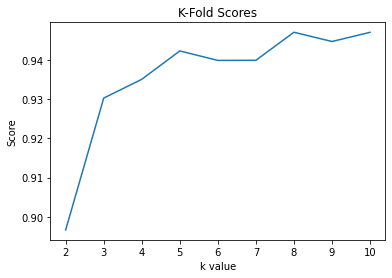

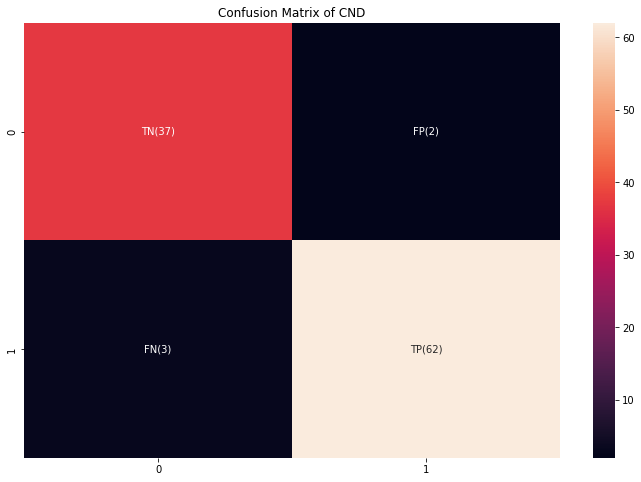

In [44]:
# PREDICTION WITH CLUSTERED DATASET STEP

# Prediction for COD
optimized_prediction(clustered_knn, x_train_clustered_df, Y_train_clustered_df, x_test_clustered_df,
                     Y_test_clustered_df, isNormalized=False, isClustered=True, message="COD")
# Prediction for CND
optimized_prediction(clustered_normalized_knn, x_train_clustered_normalized_df, Y_train_clustered_normalized_df,
                     x_test_clustered_normalized_df, Y_test_clustered_normalized_df, isNormalized=True,
                     isClustered=True, message="CND")

#### Commenting about the models were made in detail in the report.